# Final Project 1
---
## Latar Belakang
Salah satu bidang terpenting dalam statistik dan Machine Learning adalah analisis regresi. Dalam regresi sendiri memiliki beragam jenis, salah satunya adalah Regresi Linier yang akan dipakai pada project kali ini. Regresi Linier sendiri biasa digunakan untuk membentuk model hubungan antara variabek dependen (Y) dengan variabel independen (X). Pendekatan ini juga dapat digunakan untuk meramalkan data yang diperlukan guna menentukan korelasi linier antar variabel. Pada project kali ini akan menganalisis terkait tarif jasa transformasi. Pada data memiliki 2 jenis layanan transformasi online yang paling banyak digunakan di NY yaitu Uber dan Lyft.

Dalam project ini akan melakukan prediksi harga berdasarkan  faktor cuaca, hari dalam seminggu, jarak, dll. Guna membantu penduduk dalam memilih transportasi online terbaik dengan biaya terendah serta akan menentukan algoritma apa yang terbaik untuk memprediksi harga jasa transportasi online.

---

Kelompok: <br>
<ol>
<li>Immantaka Juniarsa</li>
<li>Widawati Annisa Putri</li>
<li>Muhammad Farhan Atsar Ghiffari</li>
</ol>


Objectives/goal:
1. prediksi harga taksi online dengan variabel yang paling berpengaruh
2. model mana yang paling optimal untuk memprediksi harga dan berapa nilai akurasi dari masing-masing model

Sumber Dataset: <br>
<center><a src="https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma">Uber and Lyft Dataset Boston, MA</a>

## Library
---

In [5]:
# for data
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

# for encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# for splitting data
from sklearn.model_selection import train_test_split

# building model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# menghitung R^2
from sklearn.metrics import r2_score

# MSE
from sklearn.metrics import mean_squared_error




In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Data Loading
---

### read data

In [7]:
df = pd.read_csv('rideshare_kaggle.csv', sep=',')

In [8]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### dimensi dataset

In [9]:
df.shape

(693071, 57)

Dari output di atas dapat diketahui jumlah baris pada data ada 693.071 dan ada 57 kolom.

### Informasi dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari output di atas dapat diketahui selain baris dan kolom yang telah diketahui sebelumnya, ada 29 variabel yang bertipe float, 17 integer, dan 11 objek.

### Nilai unique data

In [11]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Dari output di atas dapat diketahui nilai unique dalam data.

## Data Cleaning
---

In [12]:
# mengecek missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dapat terlihat bahwa dikolom price memiliki 55095 missing value, maka perlu dilakukan filling pada kolom yang mengandung missing values.

In [13]:
# menghapus nilai yang kosong
df = df.dropna(subset=['price']).reset_index()

In [14]:
# melihat duplikasi data
df.duplicated().sum()

0

dari output di atas dapat diketahui tidak ada data duplikat.

In [15]:
# Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru
kolom = [
    "cab_type", 
    "name", 
    "hour", 
    "day",
    "month",
    "source", 
    "destination", 
    "price", 
    "distance", 
    "short_summary",
    "temperature",
    "surge_multiplier"
]

data = df[kolom]

In [16]:
data.head()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0


In [17]:
data.tail()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier
637971,Uber,WAV,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,1.0
637972,Uber,UberXL,23,1,12,West End,North End,13.0,1.0,Partly Cloudy,37.05,1.0
637973,Uber,UberX,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,1.0
637974,Uber,Black SUV,23,1,12,West End,North End,27.0,1.0,Partly Cloudy,37.05,1.0
637975,Uber,UberPool,23,1,12,West End,North End,10.0,1.0,Partly Cloudy,37.05,1.0


**Keterangan**

Dari jumlah kolom yang ada diambil beberapa kolom yang diperlukan oleh case project ini, diantaranya:

*   cab_type : jenis kendaraan yang dipesan ,
*   name : nama produk,
*   hour : jam pemesanan,
*   day : hari pemesanan,
*   month : bulan pemesanan,
*   source : lokasi awal pelanggan,
*   destination : lokasi tujuan pelanggan,
*   price : harga,
*   distance : jarak tempuh,
*   short_summary : ringkasan cuaca,
*   temperature : suhu,
*   surge_multiplier : faktor pengali harga

In [18]:
# Mengecek jenis cuaca 
print(data["short_summary"].value_counts())

 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: short_summary, dtype: int64


dari output di atas dapat diketahu jenis cuaca apa saja yang terdapat dalam data.

In [19]:
# Membuat variabel baru data_copy untuk menampung nilai dari data
data_copy = data.copy()

# Melihat data data_copy
data_copy

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
637971,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0
637972,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,1.0
637973,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0
637974,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,1.0


In [20]:
# Membuat Fungsi Rute
def rate(data_copy):
    # Jika Cuaca Overcast
    if data_copy["short_summary"] == " Overcast ":
        hasil = round((data_copy["price"]/data_copy["distance"])*1.5, 2)
    # Jika Cuaca Mostly Cloudy
    elif data_copy["short_summary"] == " Mostly Cloudy ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2, 2)
    # Jika Cuaca Partly Cloudy
    elif data_copy["short_summary"] == " Partly Cloudy ":
        hasil = round((data_copy["price"]/data_copy["distance"])*1.5, 2)
    # Jika Cuaca Light Rain
    elif data_copy["short_summary"] == " Light Rain ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2.5, 2)
    # Jika Cuaca Rain
    elif data_copy["short_summary"] == " Rain ":
        hasil = round((data_copy["price"]/data_copy["distance"])*3, 2)
    # Jika Cuaca Possible Drizzle
    elif data_copy["short_summary"] == " Possible Drizzle ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2, 2)
    # Jika Cuaca Foggy
    elif data_copy["short_summary"] == " Foggy ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2, 2)
    # Jika Cuaca Drizzle
    elif data_copy["short_summary"] == " Drizzle ":
        hasil = round((data_copy["price"]/data_copy["distance"])*2.5, 2)
    # Jika Cuaca Clear
    else:
        hasil = round(data_copy["price"]/data_copy["distance"], 2)
    return hasil

data_copy["rate"] = data_copy.apply(rate, axis=1)


In [21]:
# Melihat data data_copy
data_copy

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier,rate
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0,22.73
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0,75.00
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0,15.91
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0,59.09
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0,14.25
637972,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,1.0,19.50
637973,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,1.0,14.25
637974,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,1.0,40.50


**Keterangan**

Tarif (rate):

1. Overcast = 1,5
2. Mostly Cloudy = 2
3. Partly Cloudy = 1,5
4. Clear = 1
5. Light Rain = 2,5
6. Rain = 3
7. Possible Drizzle = 2
8. Foggy = 2
9. Drizzle = 2,5

## Exploratory Data
---

### Explore Penyedia Transport

In [22]:
data_cab_type = data_copy['cab_type'].value_counts()
data_cab_type

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

### Plot Penyedia Transport

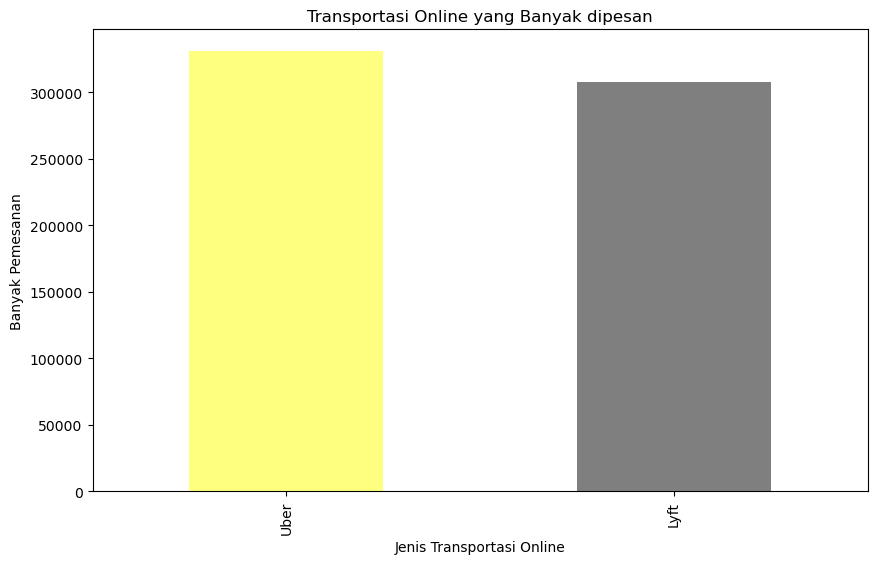

In [23]:
data_cab_type.plot(kind='bar', figsize=(10,6), color=['yellow','black'], alpha=0.5)

plt.xlabel('Jenis Transportasi Online')
plt.ylabel('Banyak Pemesanan')
plt.title('Transportasi Online yang Banyak dipesan')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**kesimpulan**

dari diagram diatas, diketahui bahwa transportasi online yang paling banyak dipesan ialah Uber dengan total pemesanan sebesar 330568. Sedangkan pengguna Lyft memiliki total pemesanan sebesar 307408

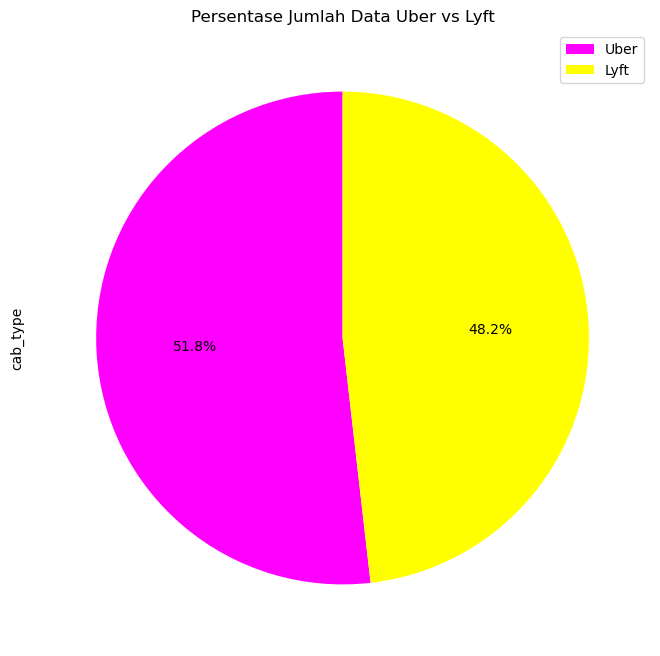

In [24]:
# Memvisualisasikan kolom Penyedia Transport dalam bentuk pie chart
pie_color=['magenta','yellow']
data_cab_type.plot(kind="pie", figsize=(14,8), startangle=90, autopct="%1.1f%%", labels=None, colors=pie_color)
plt.title('Persentase Jumlah Data Uber vs Lyft')
plt.legend(labels=data_cab_type.index)

# Save Plot
plt.savefig("transport_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**kesimpulan**

Dari hasil pie chart di atas, dapat diketahui bahwa persentase jumlah data pada Uber adalah 51.8% dan Lyft adalah 48.2%.

### Explor Jenis Layanan

In [25]:
# Melihat jenis layanan yang ditawarkan oleh Lyft
data_name_Lyft = pd.DataFrame(data_copy[(data_copy['cab_type']=='Lyft')].groupby(['name'])['name'].count())
data_name_Lyft

,name
name,
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft,51235
Lyft XL,51235
Shared,51233


In [26]:
# Melihat jenis layanan yang ditawarkan oleh Uber
data_name_uber = pd.DataFrame(data_copy[(data_copy['cab_type']=='Uber')].groupby(['name'])['name'].count())
data_name_uber

,name
name,
Black,55095
Black SUV,55096
UberPool,55091
UberX,55094
UberXL,55096
WAV,55096


In [27]:
# Mengubah menjadi numerik
data_num_name = pd.DataFrame(data_copy.groupby(["cab_type"])["name"].value_counts())
data_num_name

name
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black SUV     55096
         UberXL        55096
         WAV           55096
         Black         55095
         UberX         55094
         UberPool      55091

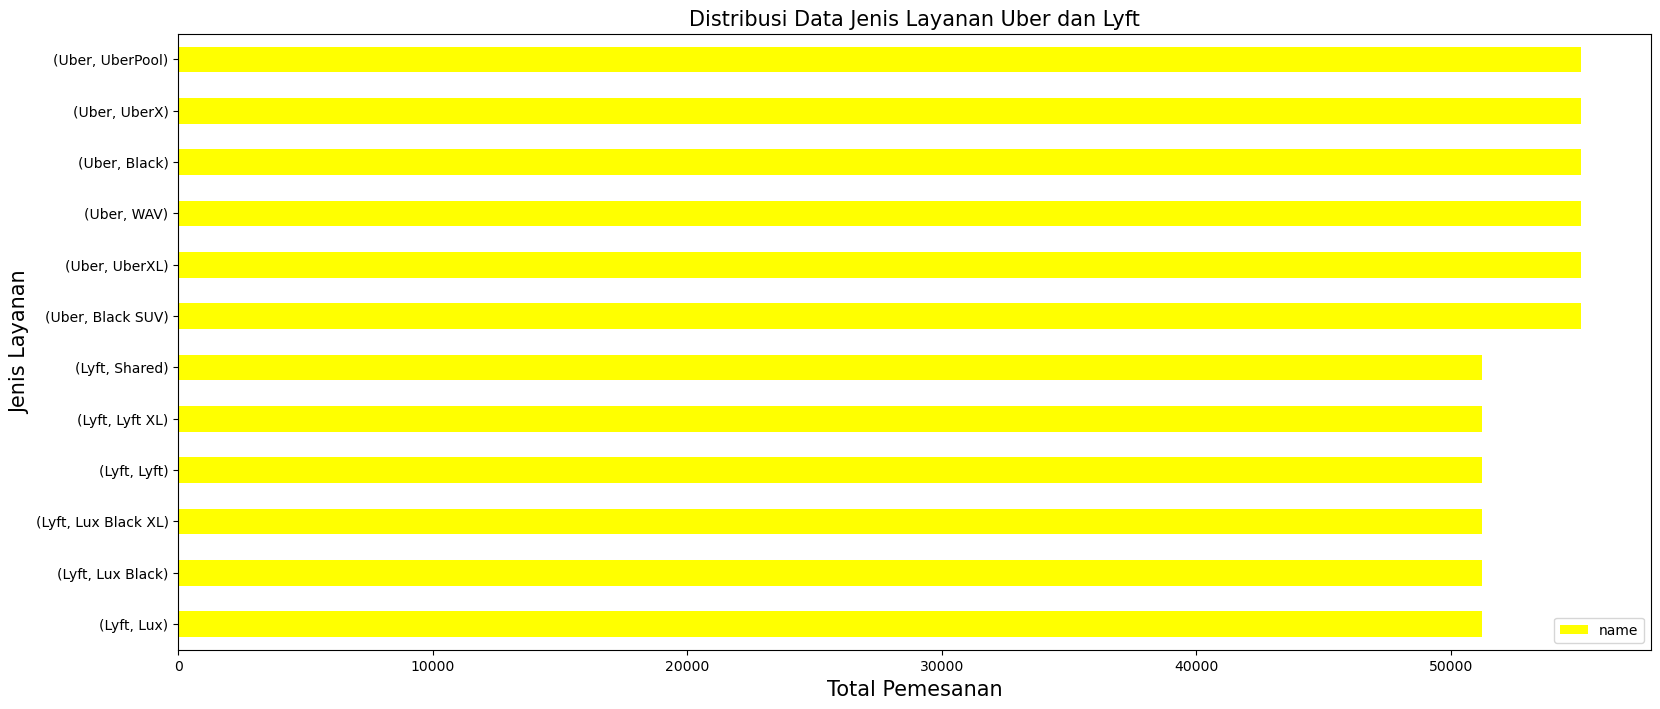

In [28]:
#Memvisualiasikan kolom Penyedia Transport dan Jenis Layanan berdasarkan total Jenis Layanan
data_num_name.plot(kind="barh", figsize=(19,8), color='yellow')

plt.title("Distribusi Data Jenis Layanan Uber dan Lyft", fontsize=15)
plt.ylabel("Jenis Layanan", fontsize=15)
plt.xlabel("Total Pemesanan", fontsize=15)

# Save Plot
plt.savefig("kind_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**kesimpulan**

Dari bar chart di atas, dapat diketahui bahwa Uber dengan semua tipe layanan (UberPool, UberX, Black, WAV, UberXL, dan Black SUV) memiliki data yang signifikan. Begitu pula dengan Lyft.

### Explore Cuaca

In [29]:
#Melihat nilai unique pada kolom short_weather
data_copy['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [30]:
# Membuat dataframe yang berisi jumlah data penumpang berdasarkan cuaca
data_weather=pd.DataFrame(data_copy.groupby(['short_summary'])['short_summary'].value_counts())
data_weather=data_weather.rename(columns={'short_summary':'value'})
data_weather.reset_index(drop=True,inplace=True)
data_weather['short_summary']=['clear','Drizzle','Foggy','Light Rain','Mostly Cloudy',
                      'Overcast','Partly Cloudy','Possible Drizzle','Rain']
data_weather=data_weather.set_index('short_summary')
data_weather

,value
short_summary,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


In [31]:
# Menyiapkan dataframe untuk ploting pie chart
data_weather_max=pd.DataFrame(data_copy.groupby(['short_summary','cab_type']).max()['distance'].sort_values())
data_weather_max=data_weather_max.rename(columns={'cab_type':'value'})
data_weather_max

,,distance
short_summary,cab_type,
Drizzle,Lyft,5.44
Foggy,Lyft,5.86
Possible Drizzle,Lyft,6.04
Partly Cloudy,Lyft,6.09
Light Rain,Lyft,6.13
Clear,Lyft,6.14
Overcast,Lyft,6.33
Rain,Lyft,6.33
Mostly Cloudy,Lyft,6.33


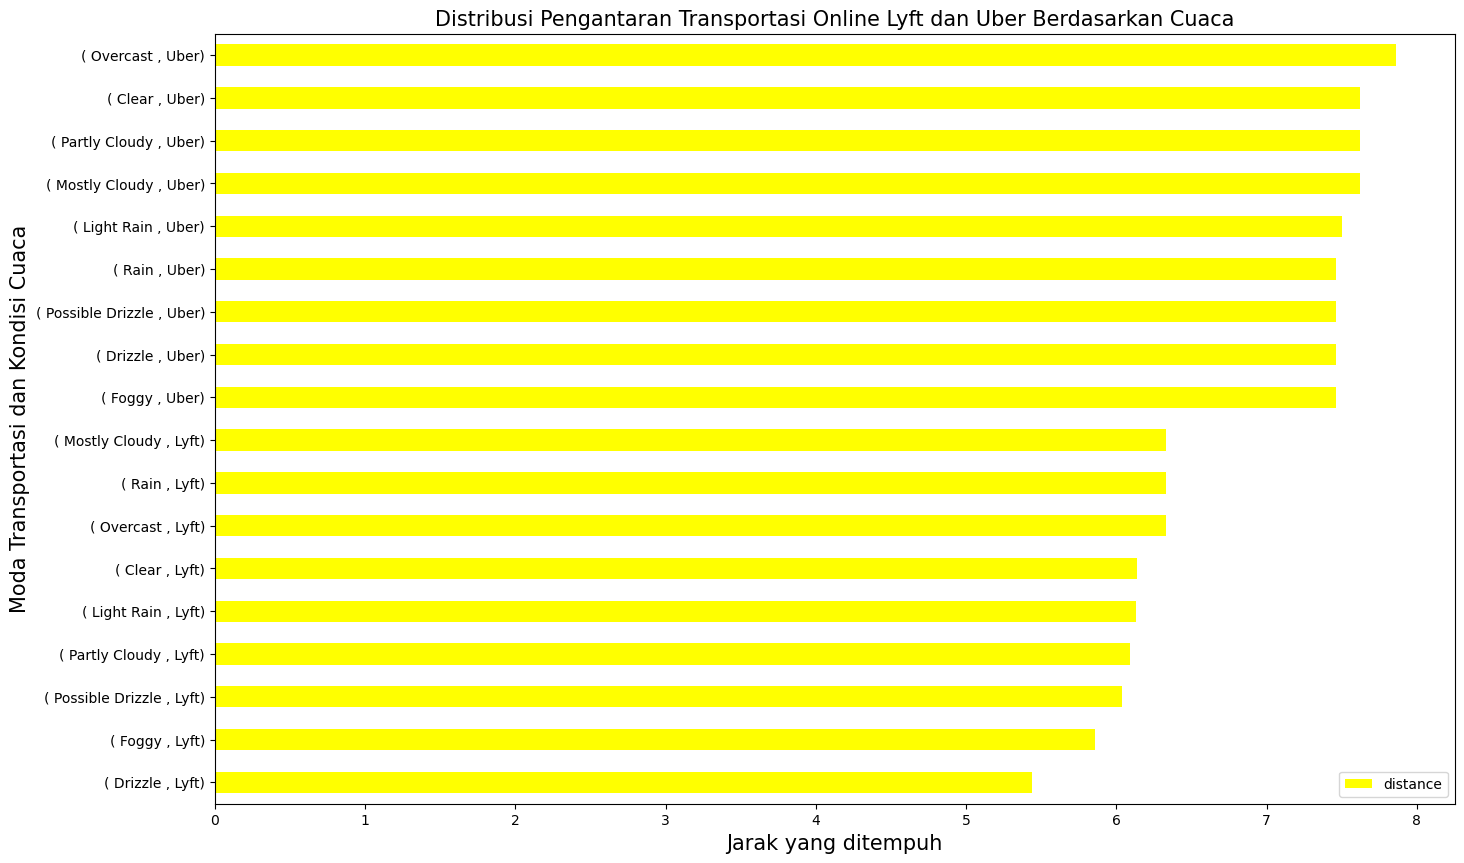

In [32]:
#Memvisualisasikan kolom weather dengan transport_name dalam bentuk horizontal bar charts
data_weather_max.plot(kind="barh", figsize=(16,10), color='yellow')

plt.title("Distribusi Pengantaran Transportasi Online Lyft dan Uber Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Moda Transportasi dan Kondisi Cuaca", fontsize=15)
plt.xlabel("Jarak yang ditempuh", fontsize=15)

# Save Plot
plt.savefig("weather_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**kesimpulan**

Dari bar chart di atas, dapat diketahui ketika cuaca sedang mendung, Uber mengantar penumpang dengan jarak yang ditempuh maksimal sejauh 7.86 km. Sedangkan Lyft dengan cuaca berawan, jarak yang ditempuh maksimal sejauh 6.33 km.

In [33]:
#Membuat variabel cuaca dan trans untuk mendukung data cuaca yang akan divisualisasikan dalam bentuk pie charts
cuaca = data_copy['short_summary'].value_counts()
trans = pd.DataFrame(data=cuaca.index, columns=["short_summary"])
trans['values'] = cuaca.values

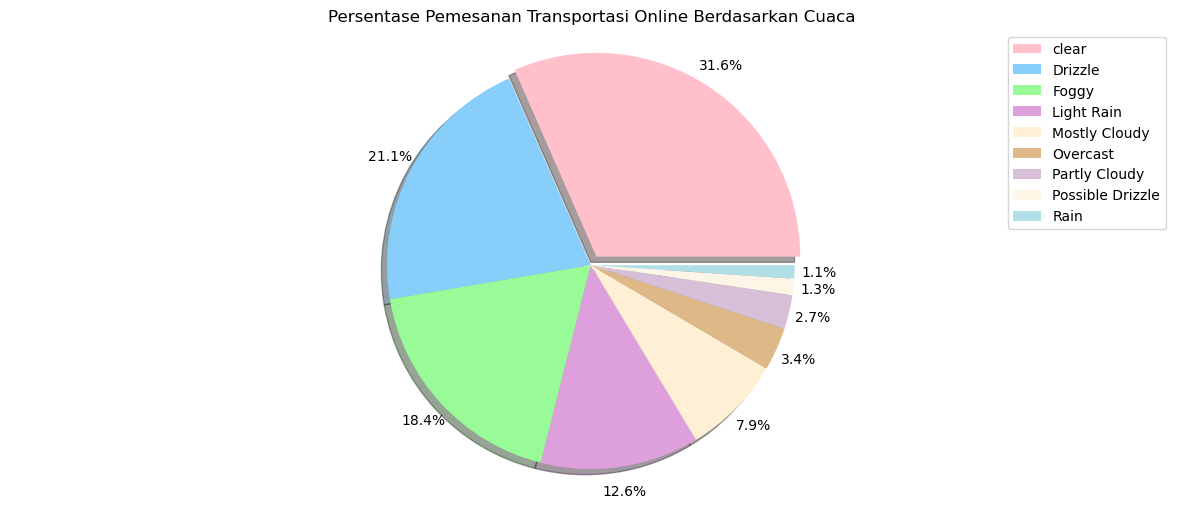

In [34]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0,0,0,0,0,0,0,0]
color_list=['pink','lightskyblue','palegreen','plum','papayawhip','burlywood','thistle','oldlace','powderblue']
cuaca.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online Berdasarkan Cuaca')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=data_weather.index, loc='upper right')

# Save Plot
plt.savefig("weather_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()


**kesimpulan**

Berdasarkan diagram lingkaran tersebut, persentase pemesanan transportasi online tertinggi pada keadaan cuaca cerah dengan 31.6% dan persentase terendah pada keadaan mendung dengan 3.4%

### Explor Price

C:\Users\Immantaka Juniarsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


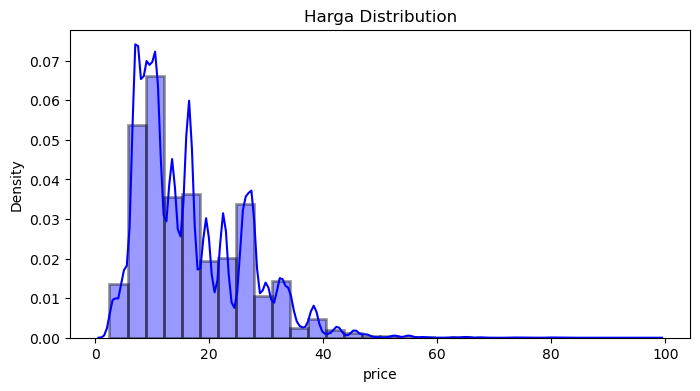

In [35]:
plt.figure(figsize=[8,4])
sns.distplot(data['price'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Harga Distribution')
plt.show()

Dari output di atas dapat diketahui bahwa data terdistribusi normal positif.

C:\Users\Immantaka Juniarsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


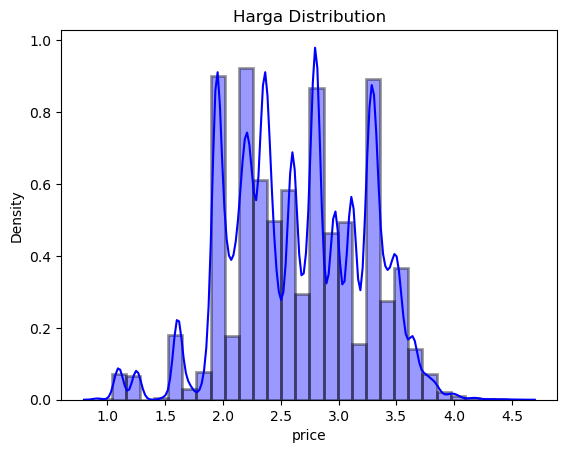

In [36]:
# menggunakan numpy log untuk mengurangi skewness
plt.Figure(figsize=[8,4])
sns.distplot(np.log(data['price']), color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Harga Distribution')
plt.show()

mengubah data price yang sebelumnya skew positif menjadi normal dengan menggunakan numpy log

<center> dapat dilihat bahwa customer lebih sering menggunakan produk dari uber dibandingkan dengan produk dari lyft.

<AxesSubplot:>

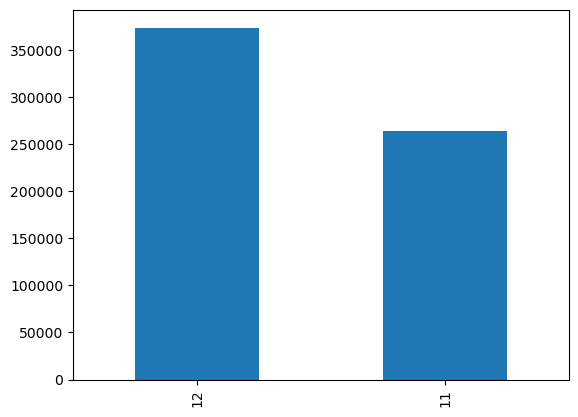

In [37]:
# melihat value yang terdapat pada kolom month
df['month'].value_counts().plot(kind='bar')

Berdasarkan hasil dapat dilihat bahwa data month hanya memiliki fitur November dan Desember. Dengan kata lain, data ini diambil pada bulan November dan Desember saja. dan dapat dilihat di bulan desertember, jumlah pemesanan lebih banyak dibandingkan dengan bulan November.

## Data Preprocessing
---

In [38]:
# menambahkan kolom baru untuk price logaritma
data['log_price'] = np.log(data['price'])

C:\Users\Immantaka Juniarsa\AppData\Local\Temp\ipykernel_13060\814301448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log(data['price'])


In [39]:
data.head()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,surge_multiplier,log_price
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,1.0,1.609438
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,1.0,2.397895
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,1.0,1.945910
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,1.0,3.258097
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,1.0,2.197225


Menambahkan log price pada data supaya data lebih normal

### Feature Selection

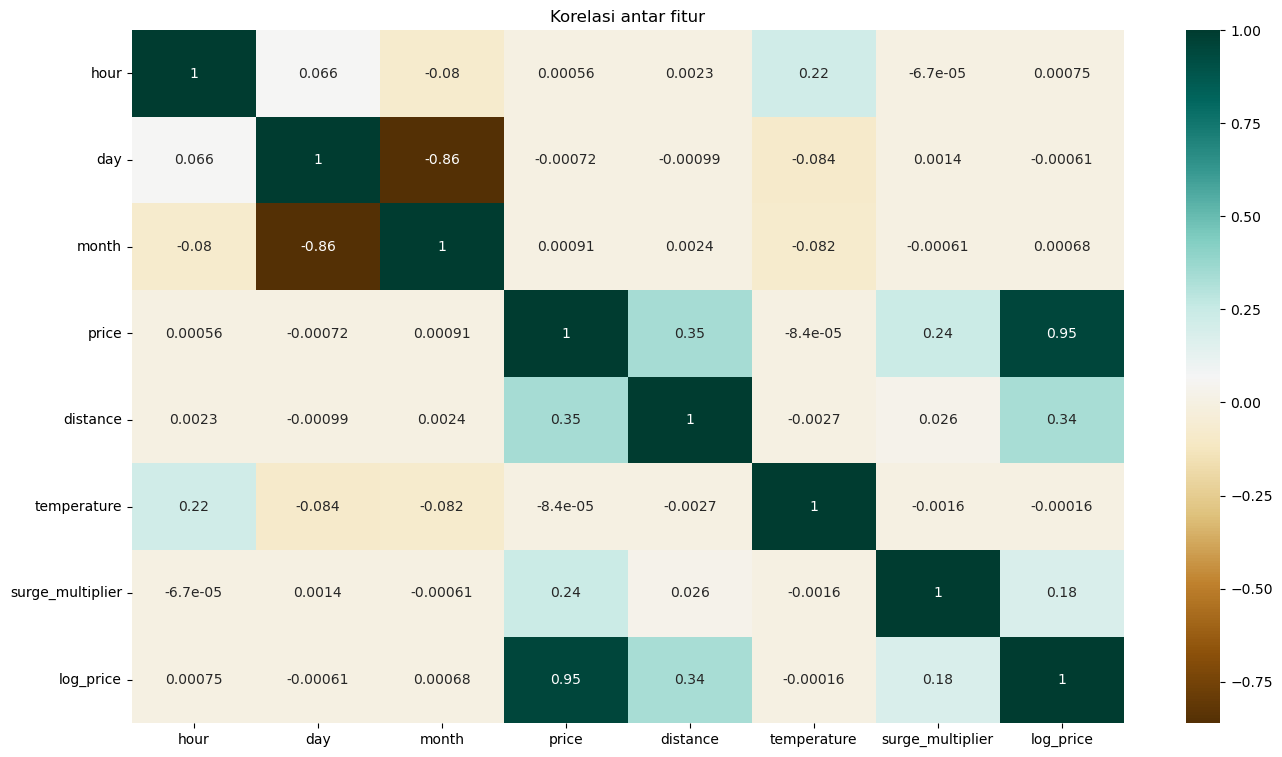

In [40]:
plt.figure(figsize=[16,9])
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.title('Korelasi antar fitur')
plt.show()

Terlihat dari matrix korelasi bahwa terdapat beberapa fitur yang memiliki korelasi dengan fitur price, seperti fitur distance dan surge_multiplier.

In [41]:
# Drop variabel yang memiliiki nilai akurasi yang rendah
data_copy=data_copy.drop(['day','temperature'], axis=1)
data_copy.head(5)

,cab_type,name,hour,month,source,destination,price,distance,short_summary,surge_multiplier,rate
0,Lyft,Shared,9,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,1.0,22.73
1,Lyft,Lux,2,11,Haymarket Square,North Station,11.0,0.44,Rain,1.0,75.00
2,Lyft,Lyft,1,11,Haymarket Square,North Station,7.0,0.44,Clear,1.0,15.91
3,Lyft,Lux Black XL,4,11,Haymarket Square,North Station,26.0,0.44,Clear,1.0,59.09
4,Lyft,Lyft XL,3,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,1.0,30.68


### Encoding

In [42]:
# encoding data menggunakan one hot encoding
data1 = pd.get_dummies(data_copy, columns=['cab_type', 'source', 'destination', 'short_summary', 'name'])

In [43]:
data1.head()

,hour,month,price,distance,surge_multiplier,rate,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,12,5.0,0.44,1.0,22.73,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,11,11.0,0.44,1.0,75.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,11,7.0,0.44,1.0,15.91,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,11,26.0,0.44,1.0,59.09,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3,11,9.0,0.44,1.0,30.68,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [44]:
# memisahkan fitur dan label
# memilih fitur X yang sudah di encode
X = data1.iloc[:, 6:]
y = data['log_price']

In [45]:
X.head()

,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
y.head()

0    1.609438
1    2.397895
2    1.945910
3    3.258097
4    2.197225
Name: log_price, dtype: float64

### train test split

In [47]:
# membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [48]:
# Standarisasi fitur dengan menggunakan StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

### Linear Regression

In [49]:
# membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# membuat prediksi
y_pred_lr = model.predict(X_test)

In [51]:
# menampilkan hasil prediksi
result_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
result_lr.head()


,Actual,Predicted
208011,3.113515,3.008404
348895,2.351375,2.771191
589727,3.113515,3.016949
22794,2.351375,2.370495
388282,1.098612,1.811657


In [74]:
# Prediksi 
score_lr = r2_score(y_test,y_pred_lr)
print('nilai R^2 : ', score_lr)
print('nilai MSE : ', mean_squared_error(y_test, y_pred_lr))
print('nilai RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

nilai R^2 :  0.8541273164362564
nilai MSE :  0.04735681249726668
nilai RMSE :  0.21761620458335973


**Interpretasi**

Didapatkan nilai R^2 sebesar 0.8541273164362564 atau sebesar 85,412% yang berarti bahwa variabel X1, X2, ... X10 secara simultan bersama - sama berpengaruh terhadap variabel price (Y) sebesar 85,412%. Sedangkan 14,588% dipengaruhi oleh variabel lain diluar persamaan regresi ini atau variabel yang di teliti.

In [54]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 8.611e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:30:32   Log-Likelihood:                 66417.
No. Observations:              637976   AIC:                        -1.327e+05
Df Residuals:                  637932   BIC:                        -1.322e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Interpretasi**

Dilihat dari nilai P(value)>0.05 variabel source_Boston University, source_Fenway, source_Northeastern University, source_South Station, memiliki nilai P(value)<0.05 maka secara individu tidak berpengaruh terhadap variabel (Y). sedangkan yang lainnya memiliki nilai P(value)> 0.05 yang berarti memiliki pengaruh terhadap variabel (Y)

### Lasso Regression

In [55]:
# membuat model lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [56]:
# membuat prediksi
y_pred_lasso = lasso.predict(X_test)

In [57]:
# menampilkan hasil prediksi
result_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
result_lasso.head()

,Actual,Predicted
208011,3.113515,2.765061
348895,2.351375,2.633046
589727,3.113515,2.765061
22794,2.351375,2.571132
388282,1.098612,2.072967


In [75]:
# melihat score dari model menggunakan R^2, MSE, RMSE
score_lasso = r2_score(y_test,y_pred_lasso)
print('nilai R^2 : ', score_lasso)
print('nilai MSE : ', mean_squared_error(y_test, y_pred_lasso))
print('nilai RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

nilai R^2 :  0.5422675535721974
nilai MSE :  0.14860047206798851
nilai RMSE :  0.3854873176486984


**Interpretasi**

Didapatkan nilai R^2 sebesar 0.5422675535721974 atau sebesar 54,227% yang berarti bahwa variabel X1, X2, ... X10 secara simultan bersama - sama berpengaruh terhadap variabel price (Y) sebesar 54,227%. Sedangkan 45,773% dipengaruhi oleh variabel lain diluar persamaan regresi ini atau variabel yang di teliti.

### Ridge Regression

In [59]:
# membuat model ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [60]:
# membuat prediksi
y_pred_ridge = ridge.predict(X_test)

In [61]:
# menampilkan hasil prediksi
result_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
result_ridge.head()

,Actual,Predicted
208011,3.113515,3.008976
348895,2.351375,2.770764
589727,3.113515,3.015657
22794,2.351375,2.370439
388282,1.098612,1.813054


In [76]:
# melihat score dari model menggunakan MSE
score_ridge = r2_score(y_test,y_pred_ridge)
print('nilai R^2 : ', score_ridge)
print('nilai MSE : ', mean_squared_error(y_test, y_pred_ridge))
print('nilai RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

nilai R^2 :  0.8541341063346416
nilai MSE :  0.04735460819186247
nilai RMSE :  0.21761113986159455


**Interpretasi**

Didapatkan nilai R^2 sebesar 0.8541341063346416 atau sebesar 85,413% yang berarti bahwa variabel X1, X2, ... X10 secara simultan bersama - sama berpengaruh terhadap variabel price (Y) sebesar 85,413%. Sedangkan 14,587% dipengaruhi oleh variabel lain diluar persamaan regresi ini atau variabel yang di teliti.

## Menentukan Model Terbaik

In [63]:
# menentukan model terbaik menggunakan R^2
print('R^2 Linear Regression: ',r2_score(y_test, y_pred_lr))
print('R^2 Lasso Regression: ', r2_score(y_test,y_pred_lasso))
print('R^2 Ridge Regression: ', r2_score(y_test, y_pred_ridge))

R^2 Linear Regression:  0.8541273164362564
R^2 Lasso Regression:  0.5422675535721974
R^2 Ridge Regression:  0.8541341063346416


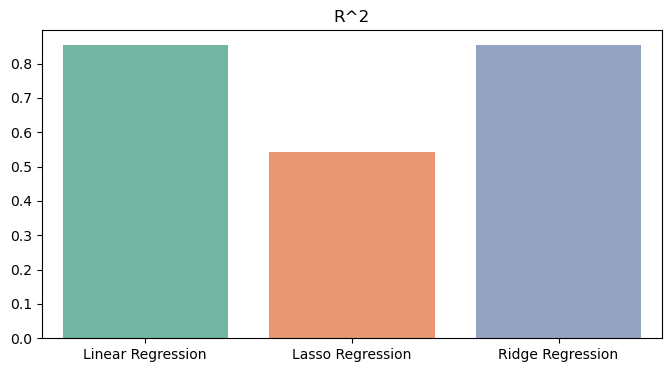

In [64]:
# visualisasi model terbaik menggunakanan R^2 seaborn dengan mengurutkan dari yang terkecil ke terbesar
plt.figure(figsize=[8,4])
sns.barplot(x=['Linear Regression', 'Lasso Regression', 'Ridge Regression'], y=[r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge)], palette='Set2')
plt.title('R^2')
plt.show()

terlihat bahwa model terbaik adalah model ridge regression dengan menggunakan R^2 dengan score 0.8541341063346416.

In [70]:
# menentukan model terbaik menggunakan MSE
print('MSE Linear Regression: ', mean_squared_error(y_test, y_pred_lr))
print('MSE Lasso Regression: ', mean_squared_error(y_test, y_pred_lasso))
print('MSE Ridge Regression: ', mean_squared_error(y_test, y_pred_ridge))

MSE Linear Regression:  0.04735681249726668
MSE Lasso Regression:  0.14860047206798851
MSE Ridge Regression:  0.04735460819186247


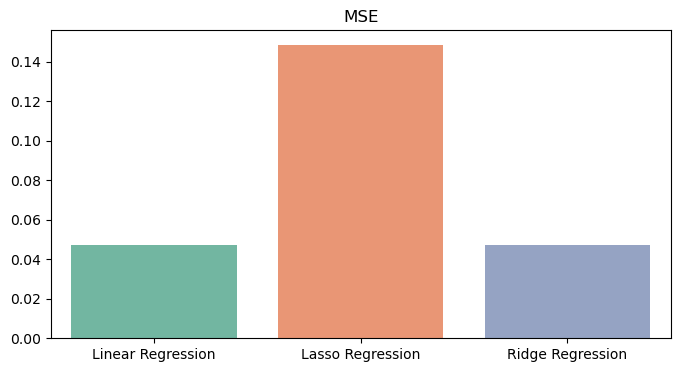

In [66]:
# visualisasi model terbaik menggunakanan MSE seaborn dengan mengurutkan dari yang terkecil ke terbesar
plt.figure(figsize=[8,4])
sns.barplot(x=['Linear Regression', 'Lasso Regression', 'Ridge Regression'], y=[mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_ridge)], palette='Set2')
plt.title('MSE')
plt.show()

terlihat bahwa model terbaik adalah model Lasso regression dengan menggunakan MSE dengan score 0.8541341063346416.

In [67]:
# menentukan model terbaik menggunakan RMSE
print('RMSE Linear Regression: ', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('RMSE Lasso Regression: ', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('RMSE Ridge Regression: ', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

RMSE Linear Regression:  0.21761620458335973
RMSE Lasso Regression:  0.3854873176486984
RMSE Ridge Regression:  0.21761113986159455


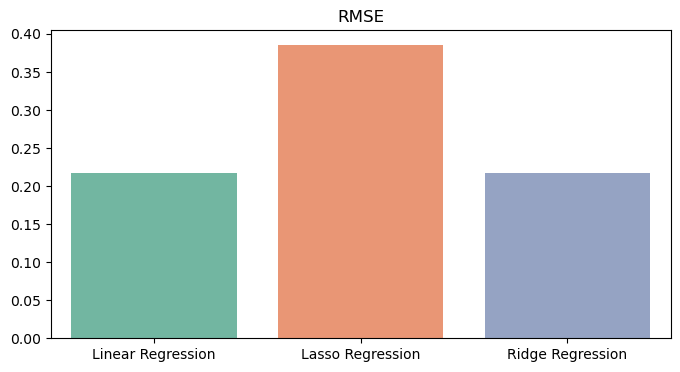

In [68]:
# visualisasi model terbaik menggunakanan RMSE seaborn dengan mengurutkan dari yang terkecil ke terbesar
plt.figure(figsize=[8,4])
sns.barplot(x=['Linear Regression', 'Lasso Regression', 'Ridge Regression'], y=[np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_lasso)), np.sqrt(mean_squared_error(y_test, y_pred_ridge))], palette='Set2')
plt.title('RMSE')
plt.show()

terlihat bahwa model terbaik adalah model Lasso regression dengan menggunakan RMSE dengan score 0.3854873176486984.

## Kesimpulan
Dari analisis di atas, dapat diambil beberapa kesimpulan:

1. Dari 57 atribut yang ada, diambil 8 atribut yang paling berpengaruh dalam prediksi harga taksi online, diantaranya cab_type, name, hour, month, source, destination, distance, short_summary, surge_multiplier, dan rate.
2. Metode pengujian menggunakan 3 model, yaitu linear regression, lasso regression, dan ridge regression dengan masing - masing nilai akurasi 85.412%, 54.227% dan 85.413%
3. Model lasso regression adalah model yang paling optimal dengan RMSE sebesar 0.3855